# Notebook to deep dive into results

In [6]:
import pandas as pd
from src.data_processing import *
from src.evaluate import *

import pandas as pd
import numpy as np
import pandas_profiling
import sys
import os

from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

## Check cv and Grid Search results
- Note that the pipline of train.py has been run to times
- In the second run a less stricly regularized log regression has been trained, because the performance of the log regression in the first run was exactly the same as the dummy classifier 

In [16]:
# Read logged metrics and parameters from csv export of mlflow ui
run_results = pd.read_csv('runs.csv', sep=',')
run_results

,Run ID,Name,Source Type,Source Name,User,Status,best_params,cv_scorer,n_cv_folds,mean_test_score_best,mean_train_score_best,std_test_best,std_train_best
0,63f2830164934b6db3c064754dd3df98,random_forest,LOCAL,train.py,jan,FINISHED,"{'max_depth': 32, 'max_features': 4}",precision,4,0.705067,1.00000,0.053356,0.000000
1,cd3a46e969134e918a083c8907b8ff9c,logistic_regression_L1,LOCAL,train.py,jan,FINISHED,{'logistic__C': 10.0},precision,4,0.550326,0.73179,0.084215,0.056860
2,e307461492e740c9965def9c3b5f5cb7,dummy,LOCAL,train.py,jan,FINISHED,{'strategy': 'most_frequent'},precision,4,0.600091,0.60001,0.017721,0.005971
3,1b8a992f80a74688bd977e46cf71d78d,random_forest,LOCAL,train.py,jan,FINISHED,"{'max_depth': 32, 'max_features': 4}",precision,4,0.705067,1.00000,0.053356,0.000000
4,cf1af815fe3d478bb060b1d717ea8454,logistic_regression_L1,LOCAL,train.py,jan,FINISHED,{'logistic__C': 0.001},precision,4,0.600091,0.60001,0.017721,0.005971
5,ca6fa64c06f0461c8aee69fb11bfb208,dummy,LOCAL,train.py,jan,FINISHED,{'strategy': 'most_frequent'},precision,4,0.600091,0.60001,0.017721,0.005971


## Deep Dive into Logistic Regression

In [12]:
# Load regression models

# Path to stricly regularized model (can be found directly on mlflow ui)
path_log_strict = "../src/mlruns/0/cf1af815fe3d478bb060b1d717ea8454/artifacts/sk-learn-zeiss_cc-logistic_regression_L1"

# Load stricly regularized log regression
log_strict = get_logged_model(path_log_strict)

# Path to moderate regularized model (can be found directly on mlflow ui)
path_log_moderate = "../src/mlruns/0/cd3a46e969134e918a083c8907b8ff9c/artifacts/sk-learn-zeiss_cc-logistic_regression_L1"

# Load stricly regularized log regression
log_moderate = get_logged_model(path_log_moderate)


Feature q_OpeningHours: 0.0
Feature q_2017 Total Households: 0.0
Feature q_2017 Purchasing Power: Per Capita: 0.0
Feature q_2017 Medical Products: Per Capita: 0.0
Feature q_5th Quint by Total HH: 0.0
Feature b_specialisation_i: 0.0
Feature b_specialisation_h: 0.0
Feature b_specialisation_g: 0.0
Feature b_specialisation_f: 0.0
Feature b_specialisation_e: 0.0
Feature b_specialisation_d: 0.0
Feature b_specialisation_c: 0.0
Feature b_specialisation_b: 0.0
Feature b_specialisation_a: 0.0
Feature b_specialisation_j: 0.0


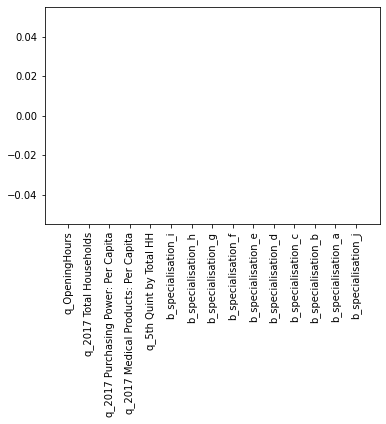

In [13]:
create_coeff_plot(log_strict)

Feature q_OpeningHours: -0.15642697895502425
Feature q_2017 Total Households: 0.48727899421874493
Feature q_2017 Purchasing Power: Per Capita: 0.042468479168664364
Feature q_2017 Medical Products: Per Capita: -0.10373146509728175
Feature q_5th Quint by Total HH: -0.2626243836963123
Feature b_specialisation_i: 0.40631094053942274
Feature b_specialisation_h: -0.6902401278985415
Feature b_specialisation_g: -0.6382952347540745
Feature b_specialisation_f: 0.039380061589358736
Feature b_specialisation_e: -0.23363615453300057
Feature b_specialisation_d: 1.5280353966455054
Feature b_specialisation_c: -0.2376279111741409
Feature b_specialisation_b: 3.780608749645128
Feature b_specialisation_a: -0.06347415257832455
Feature b_specialisation_j: 0.12858053826253277


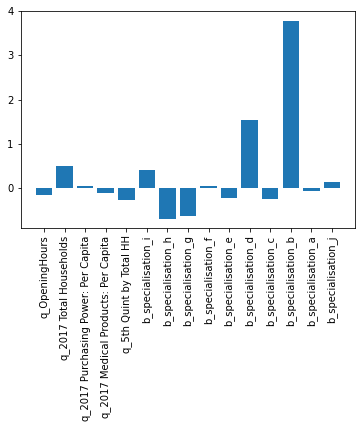

In [14]:
create_coeff_plot(log_moderate)

## Insights
- The RandomForest created on average the best score on the test sets --> smallest bias --> but highest complexity 
- The RandomForest has high variance in between the prediction of the k-fold test sets and in the test set compared to the training  
- Do to the fact that I did not have a seperate hold-out validation set it might be possible that the RandomForest overfitted the training data of the cross validation

- Suprisingly the on average best logistic regression model on the test set was the heabvily regularized model --> which exactly created the same results as the DummyClassifier and thus only predicting the most frequent (true) class.
- Due to fact that the best model has been the model shrinking all features paramters to zero is quite interesting. It could be concluded that with the provided data it is very hard to build a classifier with good generalization capability and a good predictive power.  

### Potential Next steps
- It probably would make sense to prodctionalize any classifier at this stage, beacause even the RandomForest classifier performs weakly and is expected to gerneralize not very well
- Talk to expert and collect more / other data --> to deal with high variance of complexer classifier
- If sample size is still small, but petter classifiers are found --> try semisupervised learning